# Instructions

We can skip the next cell if neural_de was installed from pip install.

In [1]:
import sys
sys.path.append("..")

Let's import from neural_de the brightness method

In [2]:
import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
from random import randint
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from pathlib import Path
from neural_de.transformations import DiffusionEnhancer
from neural_de.transformations._diffusion._diffpure_config import DiffPureConfig
import time

2025-03-06 17:31:27.783732: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 17:31:27.798373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741282287.816601    1394 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741282287.821969    1394 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 17:31:27.840918: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

We load an example image

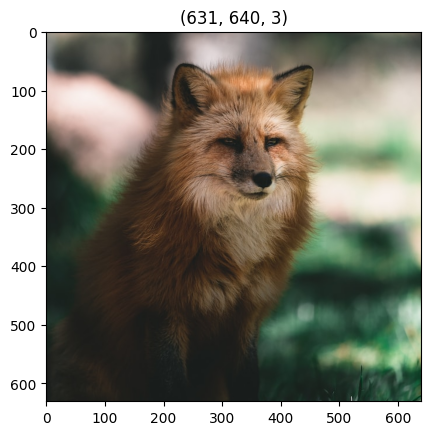

In [3]:
start=time.time()
input_path = Path('../examples/images/fox.jpg')
image = cv2.imread(str(input_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(image.shape)
plt.imshow(image);

We select a region of this image (to see details), for exemple the head, to obtain an image 256x256.
You can use all size for your images, but the model is trained and is configured to compute with the size 256x256.

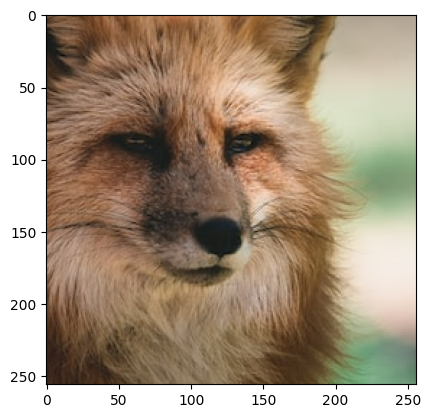

In [4]:
plt.imshow(image[100:356, 250:506]);

# Enhancing an image
We create an instance of DiffpurEnhancer

To start the process, you can modify the config parameters.
The most important are:
- t : number of times the diffusion model will clean the image per sample_step (150 by default).
- sample_step : number of steps we want the model computes the diffusion process (1 by default).
- t_delta : (15 by default)

Don't forget, il you have a gpu, select "cuda" in device parameter.

In the case where you have a gpu but it's full charged, you can run on your cpu with the following parameters:
- device = "cpu"
- config.use_fp16 = False

In [5]:
# Load ADVpurifier

#Initiate config
config= DiffPureConfig()
config.t = 150
config.t_delta = 15
config.sample_step = 1

#Select "cuda" for gpu ortherwise "cpu"
device = "cuda"

#Create instance of the diffusion model
purifier = DiffusionEnhancer(device=device, config=config)

[03-06 17:31:31] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[03-06 17:31:53] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/utils/_minio.py:67} INFO - Model already available locally, skipping download
[03-06 17:31:53] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/transformations/_diffusion/_rev_guided_diffusion.py:31} INFO - Building DiffPure model
[03-06 17:31:53] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/transformations/_diffusion/_rev_guided_diffusion.py:32} DEBUG - Model Diffpure loaded with config : DiffPureConfig(weights_path=PosixPath('/home/jovyan/.neuralde/diffpure/256x256_diffusion_uncond.pt'), img_shape=(3, 256, 256), attention_resolutions=[32, 16, 8], num_classes=None, dims=2, learn_sigma=Tru

We generate some noise on the image

In [6]:
mean = 0
sigma = 20
gaussian = np.random.normal(mean, sigma, image.shape)
noisy_image = np.zeros(image.shape, np.float32)
noisy_image = image + gaussian
noisy_image[noisy_image > 255] = 255
noisy_image[noisy_image < 0] = 0
noisy_image = noisy_image.astype(np.uint8)

In [7]:
#Apply the transform method to compute the purified image
#tensor = torch.Tensor([noisy_image[100:356, 250:506]]).permute(0, -1, -3, -2) /255
#purified = purifier.transform(tensor).permute(0, 2, 3, 1).cpu().detach().numpy()[0]
purified = purifier.transform([noisy_image[100:356, 250:506]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0052964687..1.0100781].


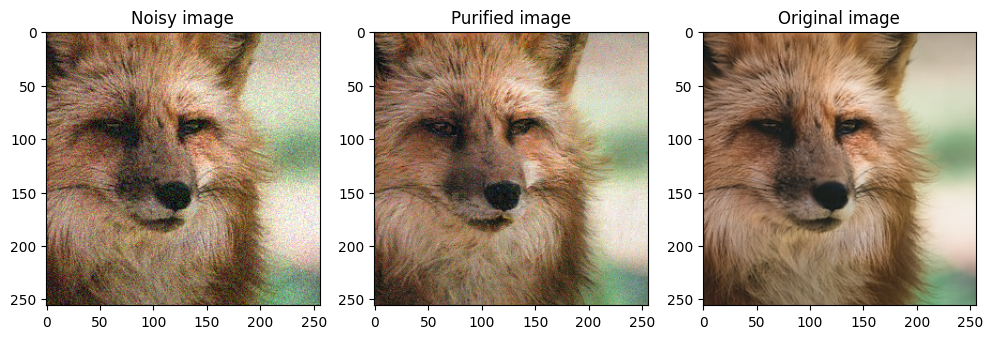

In [8]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title("Noisy image")
plt.imshow(noisy_image[100:356, 250:506])
plt.subplot(1,3,2)
plt.title("Purified image")
plt.imshow(purified[0])
plt.subplot(1,3,3)
plt.title("Original image")
plt.imshow(image[100:356, 250:506])
plt.show();

As we can see, our image is purified ! The noise pixels are attenuated.
It should also be noted that the purification of the images is one property of this model.
The other property is important, this model is resistant to the noise attacks.

# Second test
We can load another test with more steps to improve the result.

In [9]:
#Initiate config
config2= DiffPureConfig()
config2.t = 150
config2.t_delta = 15
config2.sample_step = 7

#Select "cuda" for gpu ortherwise "cpu"
device = "cuda"

#Create instance of the diffusion model
purifier2 = DiffusionEnhancer(device=device, config=config2)

[03-06 17:32:17] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[03-06 17:32:21] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/utils/_minio.py:67} INFO - Model already available locally, skipping download
[03-06 17:32:21] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/transformations/_diffusion/_rev_guided_diffusion.py:31} INFO - Building DiffPure model
[03-06 17:32:21] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/transformations/_diffusion/_rev_guided_diffusion.py:32} DEBUG - Model Diffpure loaded with config : DiffPureConfig(weights_path=PosixPath('/home/jovyan/.neuralde/diffpure/256x256_diffusion_uncond.pt'), img_shape=(3, 256, 256), attention_resolutions=[32, 16, 8], num_classes=None, dims=2, learn_sigma=Tru

In [10]:
#mean = 0
#sigma = 20
#gaussian = np.random.normal(mean, sigma, image.shape)
noisy_image2 = np.zeros(image.shape, np.float32)
noisy_image2 = image + gaussian
noisy_image2[noisy_image2 > 255] = 255
noisy_image2[noisy_image2 < 0] = 0
noisy_image2 = noisy_image2.astype(np.uint8)

In [11]:
purified2 = purifier2.transform([noisy_image2[100:356, 250:506]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.006025493..1.0095875].


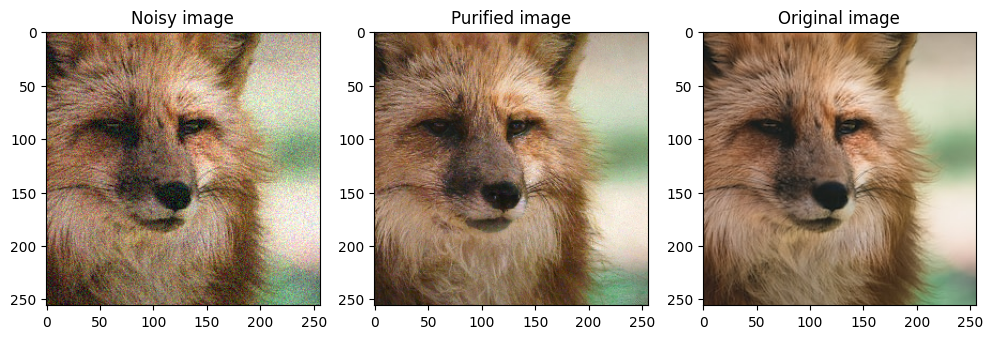

In [12]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title("Noisy image")
plt.imshow(noisy_image2[100:356, 250:506])
plt.subplot(1,3,2)
plt.title("Purified image")
plt.imshow(purified2[0])
plt.subplot(1,3,3)
plt.title("Original image")
plt.imshow(image[100:356, 250:506])
plt.show();

In [13]:
end=time.time()
print("temps final : ",end-start)

temps final :  142.39601635932922
